# WEEK 3: Notes

In this particular week, we start with the implementation of models in ML, their parameters as well as the performance measures. We will also learn about how to create baseline dummy regression models.

# Building baseline regression model

- ```DummyRegressor``` helps in creating a baseline for regression
- Makes a prediction as per the specified "strategy"
- Strategy is based on some "statistical property" of the training set or "user specified values"
- Following are the strategies:
    - mean
    - median
    - quantile
    - constant

## Data loading and splitting

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
X, y = load_iris(return_X_y=True, as_frame=True)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
X_train.shape

(112, 4)

## Baseline Regressor


In [1]:
from sklearn.dummy import DummyRegressor

dummy_reg = DummyRegressor(strategy='mean')

In [30]:
dummy_reg.fit(X_train, y_train)
test_pred = dummy_reg.predict(X_test) 

# Works even with categorical attributes in the training data


In [31]:
test_pred

array([1.02678571, 1.02678571, 1.02678571, 1.02678571, 1.02678571,
       1.02678571, 1.02678571, 1.02678571, 1.02678571, 1.02678571,
       1.02678571, 1.02678571, 1.02678571, 1.02678571, 1.02678571,
       1.02678571, 1.02678571, 1.02678571, 1.02678571, 1.02678571,
       1.02678571, 1.02678571, 1.02678571, 1.02678571, 1.02678571,
       1.02678571, 1.02678571, 1.02678571, 1.02678571, 1.02678571,
       1.02678571, 1.02678571, 1.02678571, 1.02678571, 1.02678571,
       1.02678571, 1.02678571, 1.02678571])

In [32]:
dummy_reg.score(X_test, y_test)

-0.015873329420263538

# Training Linear Regression Model

- there are 2 ways to train a Linear Regression model
    - Normal equation: 
        - ```from sklearn.linear_model import LinearRegression```
    - Iterative optimization:
        - ```from sklearn.linear_model import SGDRegressor```
        
        
- works with both, single and multi-output regression



# SGDRegressor Estimator

- Implements Stochastic Gradient Descent
- Use for large training data (>10k samples)
- Provides greater control on optimization process through provision for hyperparameter settings:
    - ```loss = 'squared error'```
    - ```loss = 'huber'``` <br><br>
    - ```penalty = 'l1'```
    - ```penalty = 'l2'```
    - ```penalty = 'elasticnet'```<br><br>
    - ```learning_rate = 'constant'```
    - ```learning_rate = 'optimal'```
    - ```learning_rate = 'invscaling'```
    - ```learning_rate = 'adaptive'```<br><br>
    - ```early_stopping = 'True'```
    - ```early_stopping = 'False'```
    <br><br>
- Good idea to use random seed while instantiating the SGD object so that we get reproducible results

In [6]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state=42)

In [7]:
X_train.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2


In [8]:
sgd.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [9]:
sgd.score(X_test, y_test)

0.910544820959746

## Feature Scaling for SGD

- SGD is sensitive to feature scaling
- Recommended to scale input feature matrix


In [11]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sgd_pipe = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('sgd_regressor', sgd)
])

In [12]:
sgd_pipe.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('sgd_regressor', SGDRegressor(random_state=42))])

In [13]:
# score returns the coefficient of determination of the prediction.

sgd_pipe.score(X_test, y_test)

0.9375546644786201

- It can be seen that the score went up from 91.05% to 93.75%

***
- **NOTE:**
    - Feature scaling is **NOT NEEDED** for <span style="color:purple">word frequencies and indicator features</span> as they have intrinsic scale.
    
    - Features extracted using **PCA** should be scaled by <span style="color:purple">some constant $C$</span> such that the averge L2 norm of the training data equals 1
***


## Setting the <span style="color:Blue">Learning Rate</span> in SGD

- Learning rate can take these 3 values:
    - 'constant'
    - 'invscaling' (default)
    - 'adaptive'
    - 'optimal' (not discussed in lectures)

<br>

### invscaling
- The default settings of SGD in SK-Learn are:
    - learning_rate = 'invscaling'
    - eta0 = 1e-2 (Initial learning rate, 0.01)
    - power_t = 0.25 (The exponent for inverse scaling learning rate)

- We can change the HPs to speed up or slow down the training process

- Learning rate reduces after every iteration with the following formula in **<span style="color:green">invscaling </span>:**
<br>

$$
\text{eta} = \dfrac{\text{eta0}}{\text{pow}(t, \text{power_}t)}
$$


***

In [16]:
pow(2,3)

8

### Constant

- in constant learning rate, ```eta=eta0```
- This learning rate will be used throughout the training

***

### Adaptive

- The learning rate is kept to the initial value as long as the **<span style="color:purple">training loss decreases</span>**
- When the stopping criterion is reached, the learning rate is <span style="color:purple">divided by 5</span> and the training loop continues
- The algorithm stops when the learning rate goes below <span style="color:purple">$10^{-6}$</span>

In [54]:
sgd_const = SGDRegressor(learning_rate='constant')
sgd_adaptive = SGDRegressor(learning_rate='adaptive')

sgd_adaptive

SGDRegressor(learning_rate='adaptive')

## Setting Epochs in SGD

- <span style="color:purple">One Epoch</span> is feeding the entire training set to the learning algorithm once.

- Use ```max_iter``` to change the epoch value. 

- Default is 1000


- **Practical tip: SGD converges after observing approximately $10^6$ training samples.**
    
- **Thus, a reasonable first guess for the number of iterations for $n$ is set using:**
    - max_iter = np.ceil($10^6$/n)

In [73]:
n = X_train.shape[0]

sgd = SGDRegressor(max_iter=int(np.ceil(10**6/n)))

sgd

SGDRegressor(max_iter=8929)

In [74]:
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.9260540014837106

## Stopping criteria in SGD

### OPTION 1: ```tol```, ```n_iter_no_change```, ```max_iter```

- The SGD stops when:
    - Either the training loss does not improve ```(loss > best_loss - tol)``` for ```n_iter_no_change``` consecutive epochs
    - Or after a maximum number of iterations ```max_iter```
- ```tol``` is the tolerance

In [76]:
sgd = SGDRegressor(loss='squared_error',
                  max_iter=500,
                  tol=1e-3,
                  n_iter_no_change=5)

# SGD will stop when either max_iter 500 is completed 
# or 
# when: {(Training loss) > best_loss - 0.001} for 5 iters


In [84]:
sgd.fit(X_train, y_train)

sgd.score(X_test, y_test)

0.9280094407790563

### OPTION 2: ```early_stopping```,```validation_fraction```

- SGD stops when:
    - Either the validation score does not improve by at least ```tol``` for ```n_iter_no_change``` consecutive epochs
    - Or after ```max_iter``` number of iterations

In [94]:
sgd = SGDRegressor(loss='squared_error',
                  max_iter=500,
                  early_stopping=True,
                  tol=1e-3, # tolerance
                  validation_fraction=0.2, # ratio of validation set
                  n_iter_no_change=5)

In [95]:
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.9273602863514955

## Averaged SGD

- Averaged SGD updates the weight vector to **<span style="color:purple">average of weights</span>** from the previous update

### OPTION 1: Avg across all updates

   ```average = True```

In [96]:
sgd = SGDRegressor(average=True) #Default = False

In [100]:
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.9227662761491008

### OPTION 2: set ```average``` to int value

- Averaging begins once the total number of samples seen reaches ```average```

For example,
```average = 10``` starts averaging after seeing 10 samples

- Averaged SGD works best with a <span style="color:purple">large number of features</span> and a <span style="color:purple">higher eta0</span>



## Monitoring SGD loss iteration-after-iteration

- We can use ```warm_start = True``` to initialize SGD with weight vetor of the previous run



In [109]:
from sklearn.metrics import mean_squared_error

In [110]:
sgd = SGDRegressor(max_iter=1,
                  tol=None,
                  warm_start=True,
                  penalty=None,
                  learning_rate="constant",
                  eta0=5e-4)

for epoch in range(1000):
    sgd.fit(X_train, y_train) # Continues where it left off
    y_test_predict = sgd.predict(X_test) # Should use cross-val here
    test_error = mean_squared_error(y_test, y_test_predict)
    print(test_error)

0.3520992792992147
0.3145686886657509
0.24082186864167524
0.20836156132565467
0.16916949578865786
0.1443101631246035
0.12547384792784957
0.11087069431800611
0.09907556266451734
0.09241326401892962
0.08002785452726825
0.07572104047376742
0.06983357523319107
0.06588469502831872
0.06363650535274372
0.06283401034391699
0.060114161235858325
0.057934333855318584
0.05734039399592915
0.05576128283421084
0.05660864402143941
0.0594391226541095
0.05565684282871669
0.05539673840947562
0.054865407935543425
0.05357224547927455
0.05304811681681518
0.054193872516489126
0.05277979245544528
0.05310074800253968
0.05266388512272097
0.05258948664402169
0.053479085420103524
0.05241209664683175
0.05268119838037313
0.052458457999202984
0.054227821500559485
0.05255141183137868
0.052251302097716466
0.05254102566644347
0.0520086477527281
0.052640478871764144
0.05267194528011642
0.05212940924511088
0.05356106305951182
0.05232941115817316
0.052380810640491535
0.05200804283723479
0.05278448719517361
0.0515786116716

In [111]:
sgd.score(X_test, y_test)

0.94694423768034

# Model Inspection

- We know that the linear regression finds the best fit line for us for the data it is trained on.

$$
\hat{y} = w_0 + w_1x_1 + w_2x_2 + ... + w_dx_d = w^Tx
$$

- the weights, $w_1, w_2, ..., w_d$ are stored in <span style="color:purple">.coef_</span>

- The intercept $w_0$ is stored in  <span style="color:purple">.intercept_</span>

In [112]:
sgd.coef_

array([-0.1123765 , -0.01788358,  0.29592857,  0.46510318])

In [113]:
sgd.intercept_

array([0.04883534])

# Model Inference

- Making predictions out of the learnt model

- Use ```.predict(features)```

In [114]:
y_test = sgd.predict(X_test)

y_test

array([ 1.26225276, -0.01705879,  2.24868342,  1.35204729,  1.3062027 ,
        0.0111322 ,  1.03764154,  1.7969714 ,  1.34209049,  1.06101121,
        1.70060269, -0.08341228, -0.15410016, -0.06684543, -0.0088186 ,
        1.41687694,  2.00435004,  1.04055291,  1.29452796,  1.95997869,
        0.02994468,  1.59692366,  0.08567565,  1.91346838,  1.91725259,
        1.85082792,  1.80477526,  2.04316355,  0.00960835,  0.02049539,
       -0.14352824, -0.04046433,  1.19370385,  0.01513032, -0.02512094,
        1.65949332,  1.30173161, -0.0612015 ])

# Model Evaluation

**General Steps in model evaluation**

- <span style="color:red">STEP 1: </span> Split data into train and test set (and also validation set)

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


- <span style="color:red">STEP 2: </span> Fit the estimator on the training data

- <span style="color:red">STEP 3: </span> Calculate the training error (AKA empirical error)

- <span style="color:red">STEP 4: </span> Calculate the test error (AKA generalization error)

- Compare training and test errors

## Evaluating trained LR model

- use ```.score``` method on the LR object

- The score returns $R^2$ or the coefficient of determination

$$
R^2 = 1 - \dfrac{SSE}{SST}
$$

- Best possible score is 1.0, when SSE=0
- Score can be negative, as the model can be arbitrarily worse
- A constant model that always predicts the exepted value of $y$ would get a score of 0


## Other Evaluation Metrics

- ```mean_absolute_error```

- ```mean_squared_error```

- ```r2_score``` (same as ```score```)

These metrics can also be used for multli-output regression setup

In [19]:
from sklearn.metrics import (mean_absolute_error, 
                             mean_squared_error, 
                             r2_score)


In [119]:
print("Mean absolute error: ", 
      mean_absolute_error(y_test, y_test_predict))
print("Mean squared error: ", 
      mean_squared_error(y_test, y_test_predict))
print("R2 score", 
      r2_score(y_test, y_test_predict))

Mean absolute error:  0.14413366347509876
Mean squared error:  0.03736683537333395
R2 score 0.94694423768034


***
- ```mean_squared_log_error```
    - Useful for targets with exponential growth like population, sales growth, etc
    - Penalizes under-estimation heavier than over-estimations

In [122]:
from sklearn.metrics import mean_squared_log_error

# mean_squared_log_error(y_test, y_test_predict)

# Cannot be used with negative values in target column

***
- ```mean_absolute_percentage_error```
    - Sensitive to relative error
    - THE OUTPUT IS NOT A PERCENTAGE
    - THE OUTPUT CAN BE A VERY LARGE NUMBER AS WELL

In [130]:
from sklearn.metrics import mean_absolute_percentage_error

print("mean_absolute_percentage_error: ", 
      mean_absolute_percentage_error(y_test, y_test_predict))



mean_absolute_percentage_error:  91557809161371.9


In [131]:
?mean_absolute_percentage_error

***
- ```median_absolute_error```
    - Robust to outliers
    

In [132]:
from sklearn.metrics import median_absolute_error,

median_absolute_error(y_test, y_test_predict)

0.08454396734952596

## Evaluating regression model on WORST CASE ERROR

- Use ```max_error```

- To calculate the worst case error on **train set**, use the following:
          max_error(y_train, y_pred)
        
- To calculate the worst case error on **test set**, use the following:
          max_error(y_test, y_pred)
          
    - Can only be used for single output regression
    - IT DOES NOT APPLY to multi-output regression problems

***
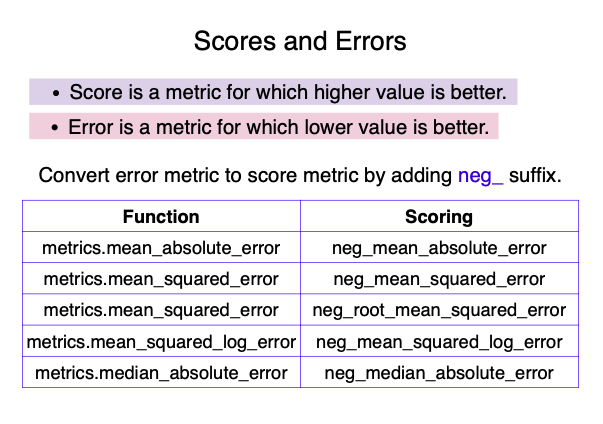
***
***

In [139]:
1-mean_squared_error(y_test, y_test_predict)

0.962633164626666

# Cross Validation - For Robust Performance Evaluation

- CV performs **robust evaluation** of model performance:
    - By <span style="color:purple">repeated splitting </span> and
    - providing <span style="color:purple">many training and test errors </span>
    
- This enables us to estimate variability in generalization performance of the model

**SK-Learn implements the following CV iterators:**
- ```KFold```
- ```RepeatedKFold```
- ```ShuffleSplit```

## CV Score using ```KFolds```

- CV=5 divides the training set into 5 equal folds
- In each run, 4 folds are used to train while 1 fold is used to test


In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# First way
sgd = SGDRegressor()
kfold_cv = KFold(n_splits=5)
score = cross_val_score(sgd, X_train, y_train, cv=kfold_cv)

print(f"Score using KFold: {np.mean(score)}")
# Second way
sgd = SGDRegressor()
score = cross_val_score(sgd, X_train, y_train, cv=5)
print(f"Score without using KFold: {np.mean(score)}")

# Both the ways are same. Score may vary but slightly



Score using KFold: 0.8966194672835599
Score without using KFold: 0.9051716498942488


## CV Score using  ```LeaveOneOut```

- Leave one out is when you train on n-1 data points and test on 1 data point

- Simply put ```CV=n``` in ```KFold```

**or**

- use LeaveOneOut()

In [150]:
from sklearn.model_selection import LeaveOneOut
sgd = SGDRegressor()
n = X_train.shape[0]
loocv = LeaveOneOut()
score = cross_val_score(sgd, X_train, y_train, cv=loocv)
print(f"Score using LeaveOneOut: {score}")


/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: Un

Score using LeaveOneOut: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]


/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/PushpakRuhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: Un

## CV Score using ```ShuffleSplit```

- AKA <span style="color:purple">Random Permutation</span> based <span style="color:red">CV Strategy</span>

- Generates user defined number of train/test splits
- Robust to class distribution

- In each iteration, it shuffles order of data samples and then splits them into train/test sets

In [155]:
from sklearn.model_selection import ShuffleSplit

sgd = SGDRegressor()
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.2,random_state=42)
score = cross_val_score(sgd, X_train, y_train, cv=shuffle_split)

print(f"Score using ShuffleSplit: {np.mean(score)}")


Score using ShuffleSplit: 0.9043432163974794


## Specifying Performance Measure in ```cross_val_score```

- Set the ```scoring``` argument to any suitable performance measure


In [158]:
score = cross_val_score(sgd, X_train, y_train,
                        cv=shuffle_split,
                       scoring='max_error')

print(f"Score using ShuffleSplit: {np.mean(score)}")


Score using ShuffleSplit: -0.5497999237335527


In [161]:
score = cross_val_score(sgd, X_train, y_train,
                        cv=shuffle_split,
                       scoring='neg_mean_absolute_error')

print(f"Score using ShuffleSplit: {np.mean(score)}")


Score using ShuffleSplit: -0.19567116133004697


***
- Allowed scorers are below:
***

In [162]:
from sklearn.metrics import get_scorer_names

print(get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

## Obtaining TEST SCORES from different folds

- Use ```cross_validate```

- Returns a Python Dictionary

In [164]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(sgd, X_train, 
                            y_train, 
                            cv=shuffle_split,
                            scoring='neg_mean_absolute_error')


In [166]:
cv_results['fit_time']

array([0.00344992, 0.00291705, 0.00229192, 0.00383592, 0.0024271 ,
       0.00269604, 0.00327778, 0.00316501, 0.00250387, 0.00356293])

In [170]:
cv_results

{'fit_time': array([0.00344992, 0.00291705, 0.00229192, 0.00383592, 0.0024271 ,
        0.00269604, 0.00327778, 0.00316501, 0.00250387, 0.00356293]),
 'score_time': array([0.00194526, 0.0028522 , 0.00141525, 0.00171399, 0.00218391,
        0.00191903, 0.00161028, 0.00170779, 0.001513  , 0.00317001]),
 'test_score': array([-0.19816269, -0.17045731, -0.22828074, -0.26171124, -0.1977815 ,
        -0.16769914, -0.19622637, -0.17380813, -0.23135049, -0.19028409])}

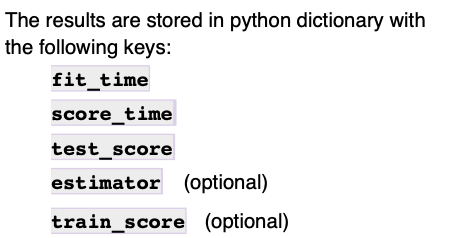

***
***
## Obtaining Trained Estimators and Scores on Training Data During CV

- For trained estimator, set ```return_estimator = True```
- For scores on training set, set ```return_train_score = True```


In [163]:
shuffle_split

ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)

In [171]:
cv_results = cross_validate(sgd, 
                            X_train, 
                            y_train,
                            cv=shuffle_split,
                            return_estimator=True,
                            return_train_score=True)

In [174]:
cv_results['estimator']

[SGDRegressor(),
 SGDRegressor(),
 SGDRegressor(),
 SGDRegressor(),
 SGDRegressor(),
 SGDRegressor(),
 SGDRegressor(),
 SGDRegressor(),
 SGDRegressor(),
 SGDRegressor()]

In [175]:
cv_results['train_score']

array([0.9116797 , 0.90973172, 0.91914946, 0.91664461, 0.91478041,
       0.89877077, 0.91338196, 0.89088494, 0.91855984, 0.90724766])

- **NOTE: ```cross_validate``` ALLOWS YOU TO SPECIFY MULTIPLE SCORING METRICS UNLIKE ```cross_val_score```**

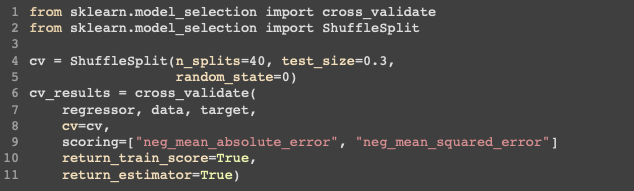

# Stuying Effect of Number of Samples on Training and Test Errors

- **STEP 1:** Instantiate an object of ```learning_curve``` class with **<span style="color:purple">estimator, training data, size, cross validation strategy</span>** and **<span style="color:purple">scoring scheme</span>** as arguments

In [193]:
from sklearn.model_selection import learning_curve

results = learning_curve(sgd,
                         X_train,
                         y_train,
                         cv=shuffle_split,
                         return_times=True, train_sizes=np.linspace(0.2, 1.0, 10),
                         scoring='neg_mean_absolute_error')

train_sizes, train_scores, test_scores, fit_times, score_times = results[:5]

# Converting the scores into errors
train_error, test_error = -train_score, -test_score

- **STEP 2:** Plot **training and test scores** as function of the size of training sets. 

- Make assessment about model fitment: under/overfitting or right fit

In [191]:
import matplotlib.pyplot as plt

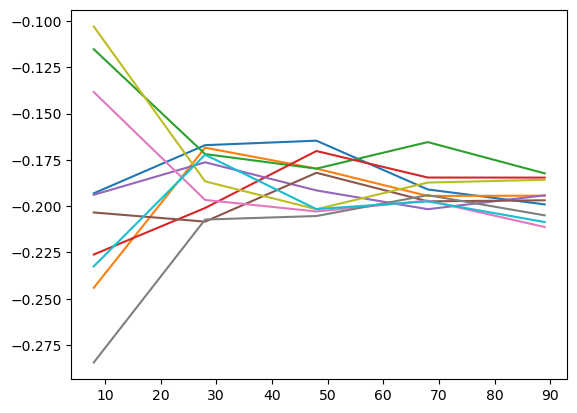

In [185]:
plt.plot(train_size, train_score)

plt.show()

In [198]:
def plot_learning_curve(train_sizes, train_scores, test_scores):
    train_scores_mean = np.mean(-train_scores, axis=1)
    train_scores_std = np.std(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    test_scores_std = np.std(-test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",)
    plt.fill_between(
    train_sizes,

    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",)
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="T")
    plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cr")
    plt.xlabel("Training examples")
    plt.ylabel("MSE")
    plt.legend(loc="best")

def plot_scalability_curve(train_sizes, fit_times):
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    plt.fill_between(
    train_sizes,
    fit_times_mean - fit_times_std,
    fit_times_mean + fit_times_std,
    alpha=0.1,)
    plt.plot(train_sizes, fit_times_mean, "o-")
    plt.xlabel("Training examples")
    plt.ylabel("Fit time")
    plt.title("Scalability of the model")

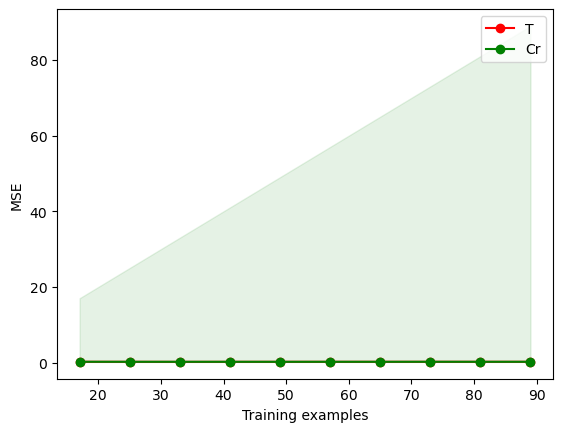

In [199]:
plot_learning_curve(train_sizes, train_scores, test_scores)

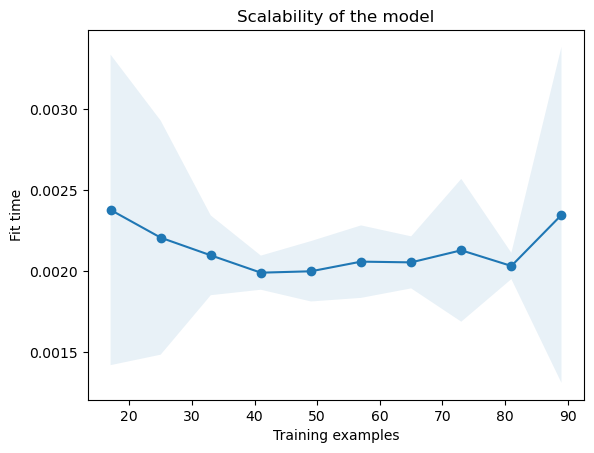

In [200]:
plot_scalability_curve(train_sizes, fit_times)

***
***
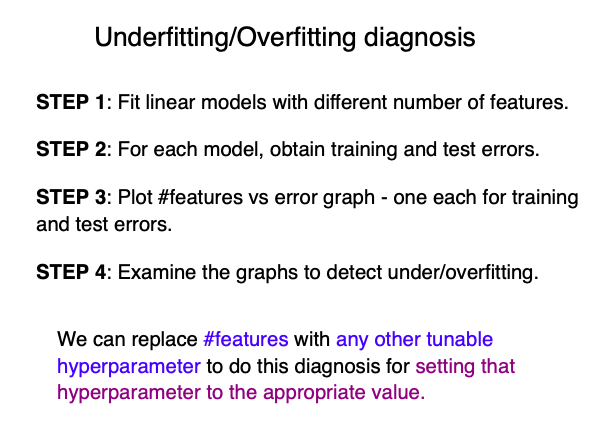